# 주의

어떤 모델이 Input Size가 2048이라면 4096개 중에서 앞의 2048만 사용

# Cell 0. Data_Prepare 설계

In [2]:
import os
import scipy.io as sio
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
def Data_Prepare():
    current_dir = os.getcwd()
    base_path = os.path.join(current_dir, "..", "..", "..", "Dataset", "CWRU", "12k")
    save_path = os.path.join(current_dir, "..", "..", "..", "Dataset", "CWRU", "Data Preprocessing(DE)")

    fault_types = ['N', 'B', 'IR', 'OR@06']

    # Create directories for Data Preprocessing
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    for fault in fault_types:
        os.makedirs(os.path.join(save_path, fault), exist_ok=True)

    # Loop through all files in the directory
    try:
        if not os.path.exists(base_path):
            raise FileNotFoundError(f"Base path does not exist: {base_path}")

        for file in os.listdir(base_path):
            if file.endswith('.mat') and '_028' not in file:
                file_path = os.path.join(base_path, file)

                # Load MATLAB file
                mat_data = sio.loadmat(file_path)

                # Extract DE (Drive End) data (dynamic key detection for DE_time)
                de_key = next((key for key in mat_data.keys() if "DE_time" in key), None)
                if de_key:
                    de_data = mat_data[de_key].flatten()
                else:
                    print(f"No DE_time data found in file: {file}")
                    continue

                # Determine fault type from file name
                fault_type = file.split('_')[0]
                if fault_type not in fault_types:
                    print(f"Unknown fault type in file name: {file}")
                    continue

                # Save DE data as CSV without header
                fault_save_path = os.path.join(save_path, fault_type)
                csv_save_path = os.path.join(fault_save_path, f"{file.replace('_DE', '')[:-4]}.csv")
                if not os.path.exists(csv_save_path):
                    pd.DataFrame(de_data).to_csv(csv_save_path, index=False, header=False)
                    print(f"Processed and saved DE data for file: {file}")
                else:
                    print(f"CSV already exists for file: {file}, skipping creation.")

    except FileNotFoundError as e:
        print(e)
    except Exception as e:
        print(f"An error occurred: {e}")

Data_Prepare()

CSV already exists for file: B_007_0.mat, skipping creation.
CSV already exists for file: B_007_1.mat, skipping creation.
CSV already exists for file: B_007_2.mat, skipping creation.
CSV already exists for file: B_007_3.mat, skipping creation.
CSV already exists for file: B_014_0.mat, skipping creation.
CSV already exists for file: B_014_1.mat, skipping creation.
CSV already exists for file: B_014_2.mat, skipping creation.
CSV already exists for file: B_014_3.mat, skipping creation.
CSV already exists for file: B_021_0.mat, skipping creation.
CSV already exists for file: B_021_1.mat, skipping creation.
CSV already exists for file: B_021_2.mat, skipping creation.
CSV already exists for file: B_021_3.mat, skipping creation.
CSV already exists for file: IR_007_0.mat, skipping creation.
CSV already exists for file: IR_007_1.mat, skipping creation.
CSV already exists for file: IR_007_2.mat, skipping creation.
CSV already exists for file: IR_007_3.mat, skipping creation.
CSV already exists f

### .mat 파일 확인

In [4]:
import os
import scipy.io as sio
import pandas as pd

# Set the base path and file name
current_dir = os.getcwd()
base_path = os.path.join(current_dir, "..", "..", "..", "Dataset", "CWRU", "12k")
file_name = "OR@06_007_0.mat"
file_path = os.path.join(base_path, file_name)

mat_data = sio.loadmat(file_path)
print(mat_data)
print(type(mat_data))

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Mon Jan 31 13:59:43 2000', '__version__': '1.0', '__globals__': [], 'X130_DE_time': array([[ 0.00852784],
       [ 0.4235496 ],
       [ 0.01299481],
       ...,
       [ 0.17583603],
       [ 0.1100498 ],
       [-0.10274022]]), 'X130_FE_time': array([[-0.40700545],
       [ 0.26277636],
       [ 0.49514545],
       ...,
       [ 0.05958182],
       [-0.05074727],
       [ 0.02732545]]), 'X130_BA_time': array([[-4.02373887e-05],
       [ 6.93290208e-02],
       [ 3.06608902e-02],
       ...,
       [ 1.18297923e-01],
       [ 5.66542433e-02],
       [-1.05019585e-02]]), 'X130RPM': array([[1796]], dtype=uint16)}
<class 'dict'>


# Cell 1. Data 분할

In [5]:
def Data_Division():
    current_dir = os.getcwd()
    preprocessing_path = os.path.join(current_dir, "..", "..", "..", "Dataset", "CWRU", "Data Preprocessing(DE)")
    division_path = os.path.join(current_dir, "..", "..", "..", "Dataset", "CWRU", "Data Division")

    fault_types = ['N', 'B', 'IR', 'OR@06']

    # Create directories for Data Division
    if not os.path.exists(division_path):
        os.makedirs(division_path)
    for fault in fault_types:
        fault_total_path = os.path.join(division_path, fault, "Total")
        fault_sample_path = os.path.join(division_path, fault, "Samples")
        os.makedirs(fault_total_path, exist_ok=True)
        os.makedirs(fault_sample_path, exist_ok=True)

    # Process each file in the preprocessing directory
    for fault in fault_types:
        fault_dir = os.path.join(preprocessing_path, fault)
        if not os.path.exists(fault_dir):
            print(f"Fault directory does not exist: {fault_dir}")
            continue

        for file in os.listdir(fault_dir):
            if file.endswith('.csv'):
                file_path = os.path.join(fault_dir, file)
                data = pd.read_csv(file_path, header=None).values.flatten()

                # Split data into 6:2:2 ratio
                train_data, temp_data = train_test_split(data, test_size=0.4, random_state=42)
                val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

                fault_total_path = os.path.join(division_path, fault, "Total")
                fault_sample_path = os.path.join(division_path, fault, "Samples")

                # Save Total datasets as CSV without header
                pd.DataFrame(train_data).to_csv(
                    os.path.join(fault_total_path, f"Total_Train_{file.replace('_DE', '')[:-4]}.csv"), index=False, header=False)
                pd.DataFrame(val_data).to_csv(
                    os.path.join(fault_total_path, f"Total_Validation_{file.replace('_DE', '')[:-4]}.csv"), index=False, header=False)
                pd.DataFrame(test_data).to_csv(
                    os.path.join(fault_total_path, f"Total_Test_{file.replace('_DE', '')[:-4]}.csv"), index=False, header=False)

                # Create samples for train, validation, and test
                # 여기서 마지막 남은 샘플은 안만들게 된다!
                def create_samples(dataset, dataset_name):
                    sample_size = 4096
                    shift_size = 2048
                    num_samples = (len(dataset) // shift_size) - 1

                    for i in range(num_samples):
                        start_idx = i * shift_size
                        end_idx = start_idx + sample_size
                        sample = dataset[start_idx:end_idx]

                        sample_file_name = f"{dataset_name}_{i+1}.csv"
                        pd.DataFrame(sample).to_csv(
                            os.path.join(fault_sample_path, sample_file_name), index=False, header=False)

                # Generate samples
                create_samples(train_data, f"Train_{file.replace('_DE', '')[:-4]}")
                create_samples(val_data, f"Validation_{file.replace('_DE', '')[:-4]}")
                create_samples(test_data, f"Test_{file.replace('_DE', '')[:-4]}")

                print(f"Processed and saved samples for file: {file}")

Data_Division()

Processed and saved samples for file: N_000_0.csv
Processed and saved samples for file: N_000_1.csv
Processed and saved samples for file: N_000_2.csv
Processed and saved samples for file: N_000_3.csv
Processed and saved samples for file: B_007_0.csv
Processed and saved samples for file: B_007_1.csv
Processed and saved samples for file: B_007_2.csv
Processed and saved samples for file: B_007_3.csv
Processed and saved samples for file: B_014_0.csv
Processed and saved samples for file: B_014_1.csv
Processed and saved samples for file: B_014_2.csv
Processed and saved samples for file: B_014_3.csv
Processed and saved samples for file: B_021_0.csv
Processed and saved samples for file: B_021_1.csv
Processed and saved samples for file: B_021_2.csv
Processed and saved samples for file: B_021_3.csv
Processed and saved samples for file: IR_007_0.csv
Processed and saved samples for file: IR_007_1.csv
Processed and saved samples for file: IR_007_2.csv
Processed and saved samples for file: IR_007_3.

## Fault Type 별 Train, Validation, Test 샘플 갯수 확인

In [6]:
import os
import pandas as pd

def Count_Sample_Files(Data):
    if Data == "CWRU":
        current_dir = os.getcwd()
        division_path = os.path.join(current_dir, "..", "..", "..", "Dataset", "CWRU", "Data Division")

        fault_types = ['N', 'B', 'IR', 'OR@06']
        counts = []

        for fault in fault_types:
            fault_sample_path = os.path.join(division_path, fault, "Samples")
            if not os.path.exists(fault_sample_path):
                print(f"Samples directory does not exist for Fault Type {fault}: {fault_sample_path}")
                continue

            fault_counts = {
                "Fault_Type": fault,
                "Train": 0,
                "Validation": 0,
                "Test": 0,
                "Train_007": {"0": 0, "1": 0, "2": 0, "3": 0},
                "Validation_007": {"0": 0, "1": 0, "2": 0, "3": 0},
                "Test_007": {"0": 0, "1": 0, "2": 0, "3": 0},
                "Train_014": {"0": 0, "1": 0, "2": 0, "3": 0},
                "Validation_014": {"0": 0, "1": 0, "2": 0, "3": 0},
                "Test_014": {"0": 0, "1": 0, "2": 0, "3": 0},
                "Train_021": {"0": 0, "1": 0, "2": 0, "3": 0},
                "Validation_021": {"0": 0, "1": 0, "2": 0, "3": 0},
                "Test_021": {"0": 0, "1": 0, "2": 0, "3": 0}
            }

            # Count files in Samples directory
            for file in os.listdir(fault_sample_path):
                parts = file.split('_')
                if len(parts) < 4:
                    continue

                dataset_type, fault_type, rpm, index = parts[0], parts[1], parts[2], parts[3]
                if dataset_type in ["Train", "Validation", "Test"] and rpm in ["007", "014", "021"] and index in ["0", "1", "2", "3"]:
                    key = f"{dataset_type}_{rpm}"
                    fault_counts[key][index] += 1
                    fault_counts[dataset_type] += 1

            counts.append(fault_counts)

        # Flatten nested dictionaries for DataFrame
        flattened_counts = []
        for count in counts:
            flat_count = {"Fault_Type": count["Fault_Type"], "Train": count["Train"], "Validation": count["Validation"], "Test": count["Test"]}
            for key, subdict in count.items():
                if isinstance(subdict, dict):
                    for subkey, value in subdict.items():
                        flat_count[f"{key}_{subkey}"] = value
            flattened_counts.append(flat_count)

        # Convert counts to DataFrame and display
        df_counts = pd.DataFrame(flattened_counts)
        return df_counts

    else:
        print("This function is currently implemented for the CWRU dataset only.")


In [124]:
Count_Sample_Files('CWRU')

,Fault_Type,Train,Validation,Test,Train_007_0,Train_007_1,Train_007_2,Train_007_3,Validation_007_0,Validation_007_1,...,Train_021_2,Train_021_3,Validation_021_0,Validation_021_1,Validation_021_2,Validation_021_3,Test_021_0,Test_021_1,Test_021_2,Test_021_3
0,N,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,B,408,120,120,34,34,34,34,10,10,...,34,34,10,10,10,10,10,10,10,10
2,IR,409,121,121,34,34,34,35,10,10,...,34,34,10,10,10,10,10,10,10,10
3,OR@06,408,120,120,34,34,34,34,10,10,...,34,34,10,10,10,10,10,10,10,10


In [7]:
# Count_Samples_Files 함수 정의

def Count_Sample_Files():
    current_dir = os.getcwd()
    division_path = os.path.join(current_dir, "..", "..", "..", "Dataset", "CWRU", "Data Division")
    
    fault_types = ['N', 'B', 'IR', 'OR@06']
    counts = []

    for fault in fault_types:
        fault_sample_path = os.path.join(division_path, fault, "Samples")
        if not os.path.exists(fault_sample_path):
            print(f"Samples directory does not exist for Fault Type {fault}: {fault_sample_path}")
            continue

        fault_counts = {
            "Fault_Type": fault,
            "Train": 0,
            "Validation": 0,
            "Test": 0,
            "Train_007": 0,
            "Validation_007": 0,
            "Test_007": 0,
            "Train_014": 0,
            "Validation_014": 0,
            "Test_014": 0,
            "Train_021": 0,
            "Validation_021": 0,
            "Test_021": 0
        }

        # Count files in Samples directory
        for file in os.listdir(fault_sample_path):
            if file.startswith("Train"):
                fault_counts["Train"] += 1
                if "007" in file:
                    fault_counts["Train_007"] += 1
                elif "014" in file:
                    fault_counts["Train_014"] += 1
                elif "021" in file:
                    fault_counts["Train_021"] += 1
            elif file.startswith("Validation"):
                fault_counts["Validation"] += 1
                if "007" in file:
                    fault_counts["Validation_007"] += 1
                elif "014" in file:
                    fault_counts["Validation_014"] += 1
                elif "021" in file:
                    fault_counts["Validation_021"] += 1
            elif file.startswith("Test"):
                fault_counts["Test"] += 1
                if "007" in file:
                    fault_counts["Test_007"] += 1
                elif "014" in file:
                    fault_counts["Test_014"] += 1
                elif "021" in file:
                    fault_counts["Test_021"] += 1

        counts.append(fault_counts)

    # Convert counts to DataFrame and display
    df_counts = pd.DataFrame(counts)
    return df_counts


In [121]:
Count_Sample_Files()

,Fault_Type,Train,Validation,Test,Train_007,Validation_007,Test_007,Train_014,Validation_014,Test_014,Train_021,Validation_021,Test_021
0,N,491,160,160,0,0,0,0,0,0,0,0,0
1,B,408,120,120,136,40,40,136,40,40,136,40,40
2,IR,409,121,121,137,41,41,136,40,40,136,40,40
3,OR@06,408,120,120,136,40,40,136,40,40,136,40,40


- 이제 007, 014, 021에 상관없이  
- 또, HP가 0,1,2,3인지 아닌지에 상관없이 Fault Type을 싹 묶어서 Train, Val, Test로 분할

# Cell 2. 클래스별 라벨링
N : 0, IR : 1, OR : 2, B : 3  
'{Train or Validation or Test}_{Fault Type}_{007 or 014 or 021}_{0 or 1 or 2 or 3}_{Sample Number}'  
따라서 Fault Type에 맞게 자동 라벨링을 진행시키자.

# Cell 3. WDCNN Baseline Model 설계  

해결해야 하는 문제
1. Validation과 Test의 Shuffle
2. WDCNN 구조 파악 -> 과연 잘 적용 되었는지?
3. 하이퍼파라미터 수정

### 3 계층

In [59]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Define paths
base_path = r"C:\Users\ChoiSeongHyeon\Desktop\Dataset\CWRU\Data Division"

# Fault type labels
fault_types = {'N': 0, 'IR': 1, 'OR@06': 2, 'B': 3}

# Load dataset
class CWRUDataset(Dataset):
    def __init__(self, dataset_type=Dataset):
        self.data = []
        self.labels = []

        for fault, label in fault_types.items():
            sample_path = os.path.join(base_path, fault, "Samples")

            if not os.path.exists(sample_path):
                print(f"Warning: Path does not exist - {sample_path}")
                continue

            for file in os.listdir(sample_path):
                if file.endswith('.csv') and dataset_type in file:
                    file_path = os.path.join(sample_path, file)
                    data = pd.read_csv(file_path, header=None).values.flatten()

                    # Ensure fixed sample size (4096)
                    if len(data) == 4096:
                        self.data.append(data)
                        self.labels.append(label)

        # Convert to PyTorch tensors
        self.data = torch.tensor(self.data, dtype=torch.float32).unsqueeze(1)  # (N, 1, 4096)
        self.labels = torch.tensor(self.labels, dtype=torch.long)

        # 🔹 "Validation"과 "Test" 데이터는 한 번만 셔플 (seed 고정)
        if dataset_type in ["Validation", "Test"]:
            np.random.seed(42)  # 실행할 때마다 동일한 shuffle 유지
            indices = np.random.permutation(len(self.data))
            self.data = self.data[indices]
            self.labels = self.labels[indices]

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]


# Define WDCNN Model
import torch
import torch.nn as nn

import torch
import torch.nn as nn

import torch
import torch.nn as nn

class WDCNN(nn.Module):
    def __init__(self, num_classes=4):
        super(WDCNN, self).__init__()

        self.conv1 = nn.Conv1d(1, 16, kernel_size=64, stride=16, padding=24)
        self.bn1 = nn.BatchNorm1d(16)
        self.pool1 = nn.MaxPool1d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv1d(16, 32, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm1d(32)
        self.pool2 = nn.MaxPool1d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv1d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm1d(64)
        self.pool3 = nn.MaxPool1d(kernel_size=2, stride=2)

        # 🔹 마지막 풀링을 Global Max Pooling으로 변경
        self.global_max_pool = nn.AdaptiveMaxPool1d(1)

        # 🔹 Fully Connected Layer
        self.fc1 = nn.Linear(64, 100)
        self.dropout = nn.Dropout(0.2)  # 🔹 Dropout 추가
        self.fc2 = nn.Linear(100, num_classes)

    def forward(self, x):
        x = torch.relu(self.bn1(self.conv1(x)))
        x = self.pool1(x)

        x = torch.relu(self.bn2(self.conv2(x)))
        x = self.pool2(x)

        x = torch.relu(self.bn3(self.conv3(x)))
        x = self.pool3(x)

        x = self.global_max_pool(x)
        x = x.view(x.size(0), -1)  # Flatten

        x = torch.relu(self.fc1(x))
        x = self.dropout(x)  # 🔹 훈련 시 Dropout 적용
        x = self.fc2(x)

        return x



# Training function with Early Stopping, Learning Rate Scheduler, and LR Output
def train_model(model, train_loader, val_loader, num_epochs=1000000, learning_rate=0.1, patience=300):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=20, verbose=True)

    best_val_acc = 0.0
    early_stop_counter = 0

    for epoch in range(num_epochs):
        model.train()
        train_loss, train_correct = 0.0, 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            train_correct += (outputs.argmax(dim=1) == labels).sum().item()

        train_acc = train_correct / len(train_loader.dataset)

        # Validation
        model.eval()
        val_loss, val_correct = 0.0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                val_correct += (outputs.argmax(dim=1) == labels).sum().item()

        val_acc = val_correct / len(val_loader.dataset)
        scheduler.step(val_loss)

        # 🔹 현재 Learning Rate 출력
        current_lr = optimizer.param_groups[0]['lr']
        print(f"Epoch {epoch+1}/{num_epochs}: LR: {current_lr:.6f}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

        # Early Stopping & Model Saving
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            early_stop_counter = 0
            torch.save({'model_state_dict': model.state_dict(),
                        'optimizer_state_dict': optimizer.state_dict(),
                        'epoch': epoch,
                        'learning_rate': current_lr},
                       "best_model.pth")
            print(f"✅ Best model saved at epoch {epoch+1} with val_acc {best_val_acc:.4f}")
        else:
            early_stop_counter += 1

        if early_stop_counter >= patience:
            print(f"🛑 Early stopping at epoch {epoch+1}")
            break


# Load data
train_dataset = CWRUDataset("Train")
val_dataset = CWRUDataset("Validation")
test_dataset = CWRUDataset("Test")

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# Initialize and train model
model = WDCNN()
train_model(model, train_loader, val_loader)


c:\Users\ChoiSeongHyeon\anaconda3\envs\NLP\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/1000000: LR: 0.100000, Train Loss: 41.7648, Train Acc: 0.3520, Val Loss: 17.4502, Val Acc: 0.4798
✅ Best model saved at epoch 1 with val_acc 0.4798
Epoch 2/1000000: LR: 0.100000, Train Loss: 15.8251, Train Acc: 0.4580, Val Loss: 7.6988, Val Acc: 0.5432
✅ Best model saved at epoch 2 with val_acc 0.5432
Epoch 3/1000000: LR: 0.100000, Train Loss: 14.7122, Train Acc: 0.5210, Val Loss: 5.9729, Val Acc: 0.5585
✅ Best model saved at epoch 3 with val_acc 0.5585
Epoch 4/1000000: LR: 0.100000, Train Loss: 12.2808, Train Acc: 0.6037, Val Loss: 4.7762, Val Acc: 0.6833
✅ Best model saved at epoch 4 with val_acc 0.6833
Epoch 5/1000000: LR: 0.100000, Train Loss: 9.2673, Train Acc: 0.7314, Val Loss: 4.5635, Val Acc: 0.7735
✅ Best model saved at epoch 5 with val_acc 0.7735
Epoch 6/1000000: LR: 0.100000, Train Loss: 8.5500, Train Acc: 0.7669, Val Loss: 5.1368, Val Acc: 0.6948
Epoch 7/1000000: LR: 0.100000, Train Loss: 6.7976, Train Acc: 0.8071, Val Loss: 1.6660, Val Acc: 0.8925
✅ Best model save

### Dynamic Batch Size

In [88]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.utils import shuffle

# Define paths
base_path = r"C:\Users\ChoiSeongHyeon\Desktop\Dataset\CWRU\Data Division"

# Fault type labels
fault_types = {'N': 0, 'IR': 1, 'OR@06': 2, 'B': 3}

# Load dataset
class CWRUDataset(Dataset):
    def __init__(self, dataset_type="Train"):
        self.data = []
        self.labels = []

        for fault, label in fault_types.items():
            sample_path = os.path.join(base_path, fault, "Samples")

            if not os.path.exists(sample_path):
                print(f"Warning: Path does not exist - {sample_path}")
                continue

            for file in os.listdir(sample_path):
                if file.endswith('.csv') and dataset_type in file:
                    file_path = os.path.join(sample_path, file)
                    data = pd.read_csv(file_path, header=None).values.flatten()

                    if len(data) == 4096:
                        self.data.append(data)
                        self.labels.append(label)

        # Convert to PyTorch tensors
        self.data = torch.tensor(self.data, dtype=torch.float32).unsqueeze(1)  # (N, 1, 4096)
        self.labels = torch.tensor(self.labels, dtype=torch.long)

        # Validation & Test 데이터는 한 번만 섞기 (재현 가능하도록)
        if dataset_type in ["Validation", "Test"]:
            np.random.seed(42)
            indices = np.random.permutation(len(self.data))
            self.data = self.data[indices]
            self.labels = self.labels[indices]

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]


# Define WDCNN Model
class WDCNN(nn.Module):
    def __init__(self, num_classes=4):
        super(WDCNN, self).__init__()

        self.conv1 = nn.Conv1d(1, 16, kernel_size=64, stride=16, padding=24)
        self.bn1 = nn.BatchNorm1d(16)
        self.pool1 = nn.MaxPool1d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv1d(16, 32, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm1d(32)
        self.pool2 = nn.MaxPool1d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv1d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm1d(64)
        self.pool3 = nn.MaxPool1d(kernel_size=2, stride=2)

        self.global_max_pool = nn.AdaptiveMaxPool1d(1)

        # Fully Connected Layer
        self.fc1 = nn.Linear(64, 100)
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(100, num_classes)

    def forward(self, x):
        x = torch.relu(self.bn1(self.conv1(x)))
        x = self.pool1(x)

        x = torch.relu(self.bn2(self.conv2(x)))
        x = self.pool2(x)

        x = torch.relu(self.bn3(self.conv3(x)))
        x = self.pool3(x)

        x = self.global_max_pool(x)
        x = x.view(x.size(0), -1)  # Flatten

        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)

        x = self.fc2(x)
        return x


# Training function with dynamic batch size
def train_model(train_dataset, val_dataset, batch_sizes=[32, 64, 128], num_epochs=300, learning_rate=0.1, patience=30):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    best_overall_acc = 0.0
    best_model_path = "best_overall_model.pth"

    for batch_size in batch_sizes:
        print(f"\n🔹 Training with Batch Size: {batch_size}")

        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

        model = WDCNN().to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=15, verbose=True)

        best_val_acc = 0.0
        early_stop_counter = 0

        for epoch in range(num_epochs):
            model.train()
            train_loss, train_correct = 0.0, 0

            for inputs, labels in train_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                train_loss += loss.item()
                train_correct += (outputs.argmax(dim=1) == labels).sum().item()

            train_acc = train_correct / len(train_loader.dataset)

            # Validation
            model.eval()
            val_loss, val_correct = 0.0, 0
            with torch.no_grad():
                for inputs, labels in val_loader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    val_loss += loss.item()
                    val_correct += (outputs.argmax(dim=1) == labels).sum().item()

            val_acc = val_correct / len(val_loader.dataset)
            scheduler.step(val_loss)

            current_lr = optimizer.param_groups[0]['lr']
            print(f"Epoch {epoch+1}: Batch {batch_size}, LR: {current_lr:.6f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")

            # Save best model for current batch size
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                early_stop_counter = 0
                torch.save(model.state_dict(), f"best_model_bs{batch_size}.pth")
                print(f"✅ Best model saved (Batch {batch_size}) with val_acc {best_val_acc:.4f}")
            else:
                early_stop_counter += 1

            if early_stop_counter >= patience:
                print(f"🛑 Early stopping at epoch {epoch+1}")
                break

        # Save best overall model
        if best_val_acc > best_overall_acc:
            best_overall_acc = best_val_acc
            torch.save(model.state_dict(), best_model_path)
            print(f"\n🏆 New Best Overall Model Saved! Val Acc: {best_overall_acc:.4f} (Batch {batch_size})")

    print("\n✅ Training completed! Best model:", best_model_path)


# Load data
train_dataset = CWRUDataset("Train")
val_dataset = CWRUDataset("Validation")

# Train with dynamic batch size
train_model(train_dataset, val_dataset)



🔹 Training with Batch Size: 32


c:\Users\ChoiSeongHyeon\anaconda3\envs\NLP\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1: Batch 32, LR: 0.100000, Train Acc: 0.4802, Val Acc: 0.4107
✅ Best model saved (Batch 32) with val_acc 0.4107
Epoch 2: Batch 32, LR: 0.100000, Train Acc: 0.6090, Val Acc: 0.7063
✅ Best model saved (Batch 32) with val_acc 0.7063
Epoch 3: Batch 32, LR: 0.100000, Train Acc: 0.7069, Val Acc: 0.8349
✅ Best model saved (Batch 32) with val_acc 0.8349
Epoch 4: Batch 32, LR: 0.100000, Train Acc: 0.7488, Val Acc: 0.8714
✅ Best model saved (Batch 32) with val_acc 0.8714
Epoch 5: Batch 32, LR: 0.100000, Train Acc: 0.7086, Val Acc: 0.5393
Epoch 6: Batch 32, LR: 0.100000, Train Acc: 0.7442, Val Acc: 0.8157
Epoch 7: Batch 32, LR: 0.100000, Train Acc: 0.7529, Val Acc: 0.7390
Epoch 8: Batch 32, LR: 0.100000, Train Acc: 0.7500, Val Acc: 0.8215
Epoch 9: Batch 32, LR: 0.100000, Train Acc: 0.7308, Val Acc: 0.8618
Epoch 10: Batch 32, LR: 0.100000, Train Acc: 0.7558, Val Acc: 0.8061
Epoch 11: Batch 32, LR: 0.100000, Train Acc: 0.7605, Val Acc: 0.8541
Epoch 12: Batch 32, LR: 0.100000, Train Acc: 0.768

## Cell 3.1 성능 평가

C:\Users\ChoiSeongHyeon\AppData\Local\Temp\ipykernel_35748\919866871.py:45: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load("best_overall_model.pth", m


📌 Classification Report:
              precision    recall  f1-score   support

           N       1.00      0.99      1.00       160
          IR       0.92      0.91      0.91       121
       OR@06       0.87      0.93      0.90       120
           B       0.94      0.90      0.92       120

    accuracy                           0.94       521
   macro avg       0.93      0.93      0.93       521
weighted avg       0.94      0.94      0.94       521



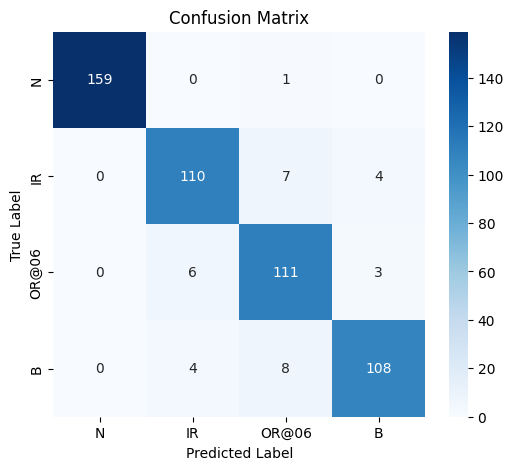

In [89]:
import torch
import torch.nn as nn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, confusion_matrix

# 🔹 Function to Evaluate Model on Test Set
def evaluate_model(model, test_loader, device):
    model.to(device)
    model.eval()

    y_true = []
    y_pred = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            predictions = torch.argmax(outputs, dim=1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predictions.cpu().numpy())

    # 🔹 Print Classification Report
    print("\n📌 Classification Report:")
    print(classification_report(y_true, y_pred, target_names=fault_types.keys()))

    # 🔹 Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=fault_types.keys(), yticklabels=fault_types.keys())
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()


# 🔹 Initialize Trained Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = WDCNN().to(device)

# 🔹 Load Best Model with Error Handling
checkpoint = torch.load("best_overall_model.pth", map_location=device)

if "model_state_dict" in checkpoint:
    model.load_state_dict(checkpoint["model_state_dict"])
else:
    model.load_state_dict(checkpoint)

# 🔹 Load Test Dataset
test_dataset = CWRUDataset("Test")
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)  # 🔹 최적의 Batch Size 적용

# 🔹 Evaluate Model on Test Dataset
evaluate_model(model, test_loader, device)


# Cell 4. Unstructured Pruning 적용 모델 설계

## Cell 4.1 성능 평가

# Cell 5. Structured Pruning 적용 모델 설계

## Cell 5.1 성능 평가

# Cell 6. Winning Ticket 찾기

## Cell 6.x 성능 평가

# Cell 7. 최종 성능 비교